In [28]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

In [29]:
path ="16_19/2016/*.parquet"
path2="16_19/2017/*.parquet"
path3="16_19/2018/*.parquet"
path4="16_19/2019/*.parquet"

In [3]:
dfzones=dd.read_csv("taxi+_zone_lookup.csv")

In [4]:
df = dd.read_parquet(path)

In [5]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
npartitions=12,,,,,,,,,,,,,,,,,,,
,int64,datetime64[ns],datetime64[ns],int64,float64,int64,object,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


**Viajes en 2016**

In [6]:
resp=df.tpep_pickup_datetime.dt.year.unique()

In [7]:
resp.compute()

0    2016
Name: tpep_pickup_datetime, dtype: int64

Cantidad de viajes por día del año

In [8]:
resp2=df.tpep_pickup_datetime.dt.day_of_year.value_counts()

In [9]:
viaxdxa=resp2.compute()

In [10]:
viaxdxa=viaxdxa.reset_index().rename(columns={"index":"day_year","tpep_pickup_datetime":"total_trips"})

Text(0.5, 0, 'día del año')

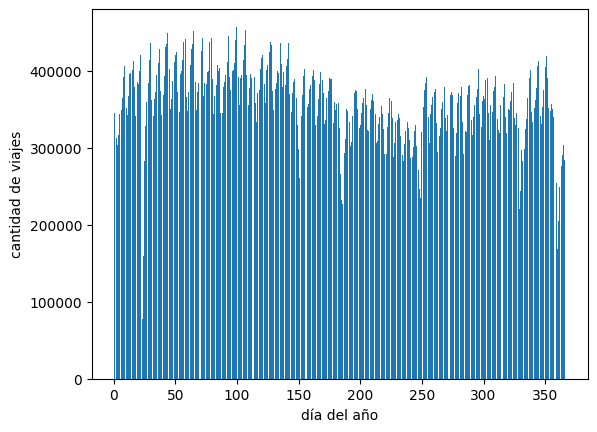

In [11]:
fig,ax=plt.subplots()
ax.bar(viaxdxa.day_year,viaxdxa.total_trips)
ax.set_ylabel("cantidad de viajes")
ax.set_xlabel("día del año")

cantidad de viajes por mes

2016

In [12]:
resp3=df.tpep_pickup_datetime.dt.month.value_counts()

In [13]:
vxm2016=resp3.compute()

In [14]:
vxm2016=vxm2016.reset_index().rename(columns={"index":"month","tpep_pickup_datetime":"total_trips"})

In [15]:
vxm2016

,month,total_trips
0,3,12203824
1,4,11927996
2,5,11832049
3,2,11375412
4,6,11131645
5,1,10905067
6,10,10854626
7,12,10446697
8,7,10294080
9,9,10116018


Text(0.5, 0, 'mes')

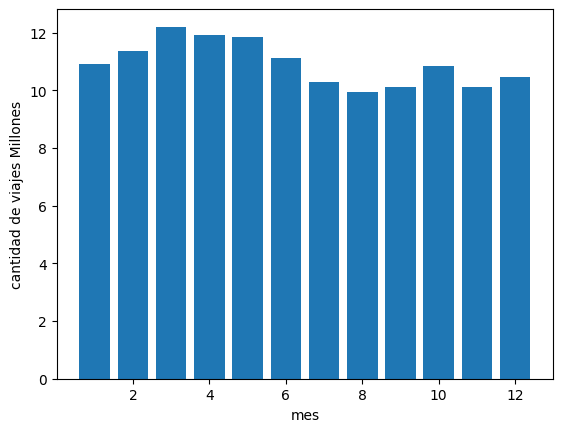

In [16]:
fig,ax=plt.subplots()
ax.bar(vxm2016.month,vxm2016.total_trips/1000000)
ax.set_ylabel("cantidad de viajes Millones")
ax.set_xlabel("mes")

2017

In [17]:
df2 = dd.read_parquet(path2)

In [18]:
resp=df2.tpep_pickup_datetime.dt.year.unique()

!!!Valores erróneos 

In [19]:
resp.compute()

0    2017
1    2009
2    2008
3    2001
4    2002
5    2053
6    2018
7    2003
8    2041
Name: tpep_pickup_datetime, dtype: int64

viajes por mes

In [31]:
resp3=df2.tpep_pickup_datetime.dt.month.value_counts()

In [32]:
vxm2017=resp3.compute()

In [33]:
vxm2017=vxm2017.reset_index().rename(columns={"index":"month","tpep_pickup_datetime":"total_trips"})

Text(0.5, 0, 'mes')

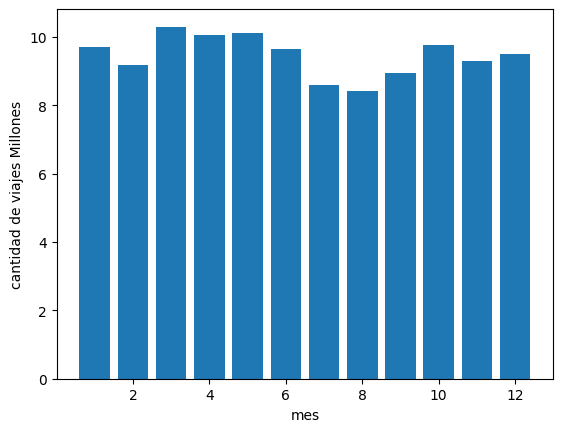

In [36]:
fig,ax=plt.subplots()
ax.bar(vxm2017.month,vxm2017.total_trips/1000000)
ax.set_ylabel("cantidad de viajes Millones")
ax.set_xlabel("mes")

2018

In [20]:
df3 = dd.read_parquet(path3)

In [21]:
resp=df3.tpep_pickup_datetime.dt.year.unique()

In [22]:
resp.compute()

0     2018
1     2017
2     2002
3     2008
4     2009
5     2001
6     2003
7     2029
8     2019
9     2031
10    2026
11    2042
12    2020
13    2037
14    2084
15    2041
16    2053
17    2032
18    2021
Name: tpep_pickup_datetime, dtype: int64

In [23]:
resp=df3.tpep_pickup_datetime.dt.year.value_counts()

In [24]:
resp.compute()

2018    102870105
2009          461
2008          348
2017          227
2019          176
2002           19
2003           12
2020           10
2001            9
2084            8
2026            2
2029            2
2031            2
2032            1
2037            1
2041            1
2042            1
2053            1
2021            1
Name: tpep_pickup_datetime, dtype: int64

viajes x mes

In [37]:
resp3=df3.tpep_pickup_datetime.dt.month.value_counts()

In [38]:
vxm2018=resp3.compute()

In [39]:
vxm2018=vxm2018.reset_index().rename(columns={"index":"month","tpep_pickup_datetime":"total_trips"})

2019

In [25]:
df4 = dd.read_parquet(path4)

In [26]:
resp=df4.tpep_pickup_datetime.dt.year.unique()

In [27]:
resp.compute()

0     2019
1     2018
2     2003
3     2008
4     2009
5     2001
6     2088
7     2038
8     2002
9     2041
10    2033
11    2020
12    2010
13    2015
14    2029
15    2090
16    2058
17    2026
18    2066
Name: tpep_pickup_datetime, dtype: int64

cantidad de viajes por mes

In [40]:
resp3=df4.tpep_pickup_datetime.dt.month.value_counts()

In [41]:
vxm2019=resp3.compute()

In [42]:
vxm2019=vxm2019.reset_index().rename(columns={"index":"month","tpep_pickup_datetime":"total_trips"})

cantidad de viajes por mes - comparacion por año

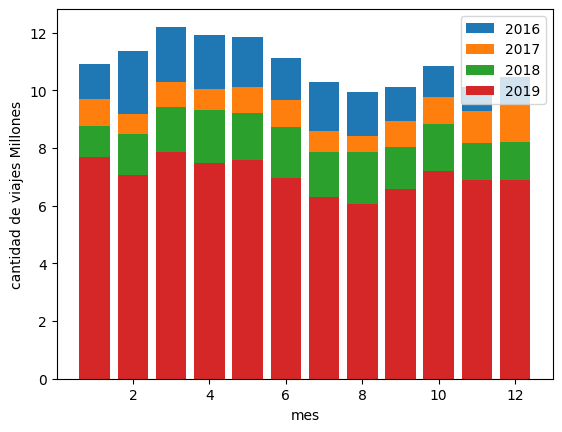

In [ ]:
fig, ax = plt.subplots()

ax.bar(vxm2016.month, vxm2016.total_trips/1000000, label='2016')
ax.bar(vxm2017.month, vxm2017.total_trips/1000000, label='2017')
ax.bar(vxm2018.month, vxm2018.total_trips/1000000, label='2018')
ax.bar(vxm2019.month, vxm2019.total_trips/1000000, label='2019')

ax.set_ylabel("cantidad de viajes Millones")
ax.set_xlabel("mes")
ax.legend()
plt.show()